##基礎演習S 後半第2回

NE21-1228F
鈴木　拓己


### Ex.2-6　「情報」の文脈（２） ※共起ネットワークによる視覚化
##### ここでは，3基礎演習別に語と語の結びつきをネットワークで表現し，その中で「情報」の位置付けを俯瞰してみたい．
##### https://www.oreilly.co.jp/pub/9784873118307/appa.html  
https://www.anarchive-beta.com/entry/2018/12/03/234525  
http://eu-mour.cocolog-nifty.com/euphoria_mourningblog/2010/09/r-1756.html


In [2]:
# 必要に応じて「ランタイム」＋「ランタイムを再起動」
# IPAフォントとmecabをインストール
system("apt-get install -y fonts-ipafont mecab libmecab-dev mecab-ipadic mecab-ipadic-utf8")
# フォント一覧を表示
# systemfonts::system_fonts()
install.packages("RMeCab", repos="http://rmecab.jp/R/")
library(RMeCab)
# グラフィクスパラメータのフォントファミリーをIPAGothicに
par(family="IPAGothic")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
# 簡約化：(コロケーション)データcdatと形態素の列番号(tn)を引数
# パンクチュエーション，数字，1文字の行を削除して返す．
remsw <- function(cdat, tn=1){
  d <- cdat[,tn]
  id1 <- grep("[[:punct:]]", d)    # dの中のパンクチュエーションの行番号
  id2 <- grep("^\\d{1}", d,perl=TRUE)   # dの中の数字の行番号
  id3 <- grep("^.{1}$",d,perl=TRUE)     # dの中の一文字の行番号
  res <- cdat[-id1,]; 
  res <- res[-id2,]; 
  res <- res[-id3,]; 
  return(res)
}

In [7]:
install.packages('igraph')
library(igraph)
cnet <- function(fn, pos){
  res <- NgramDF(fn, type=1, N=2, pos=pos) %>% 
    remsw(tn=1) %>% remsw(tn=2) %>% subset(Freq>=2)
  graph <- graph_from_data_frame(res)
  plot(graph, vertex.label=V(graph)$name, vertex.size=15, 
       vertex.label.cex = 0.8, vertex.label.dist = 0, 
       vertex.color = "Lightgreen", edge.arrow.size = 0.25,
       edge.width = 0.3, layout=layout.fruchterman.reingold) 
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



###<resについて>
resにはパイプ処理が行われている。%>%は左辺の出力を右辺の関数の第1引数にする。subsetは第１引数のデータに対して第2引数で指定した条件で抽出を行うそのためNgramDFでN-gramを構成する各要素ごとに列に取ったデータフレームを出力してそれに対して自作関数remswで列が（1,2）行に対して処理を行う。そのデータをsubsetに代入して処理を行う。

###<plotについて>
第2引数から:ノード属性nameをノードラベルにする,ノードの大きさ,
ノードラベルの文字サイズ,ラベルの距離,
ノードに色づけ,エッジの大きさ,エッジの太さとする,ネットワークのレイアウト手法
となっていた。

In [5]:
system("apt -y install zip && unzip NE2022.zip")

file = NE2022/32140.txt Ngram = 2 
file = NE2022/32556.txt Ngram = 2 


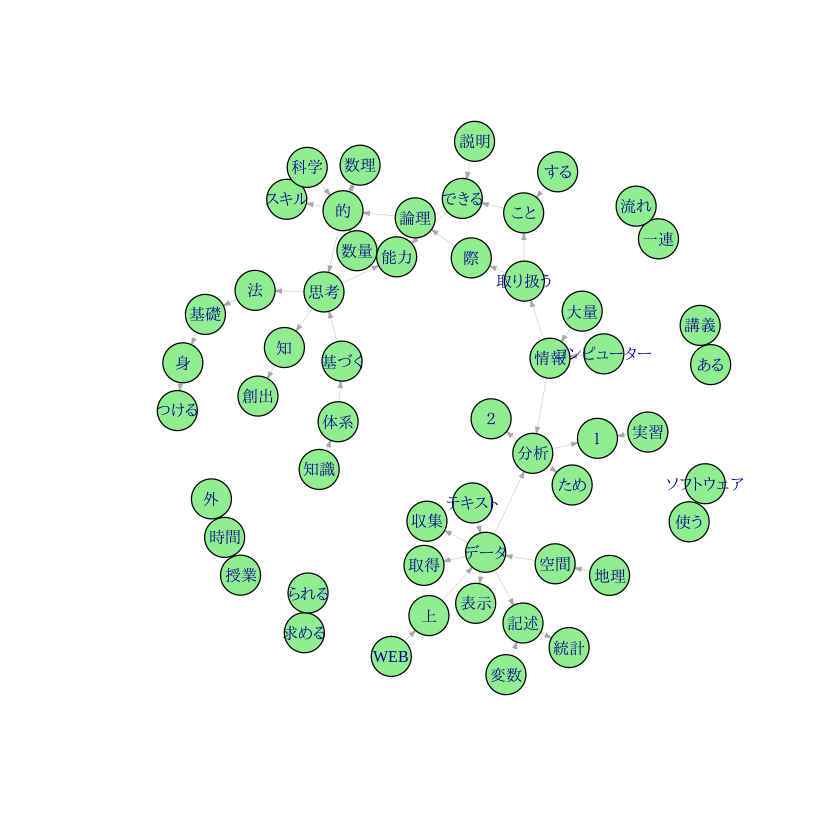

file = NE2022/32244.txt Ngram = 2 


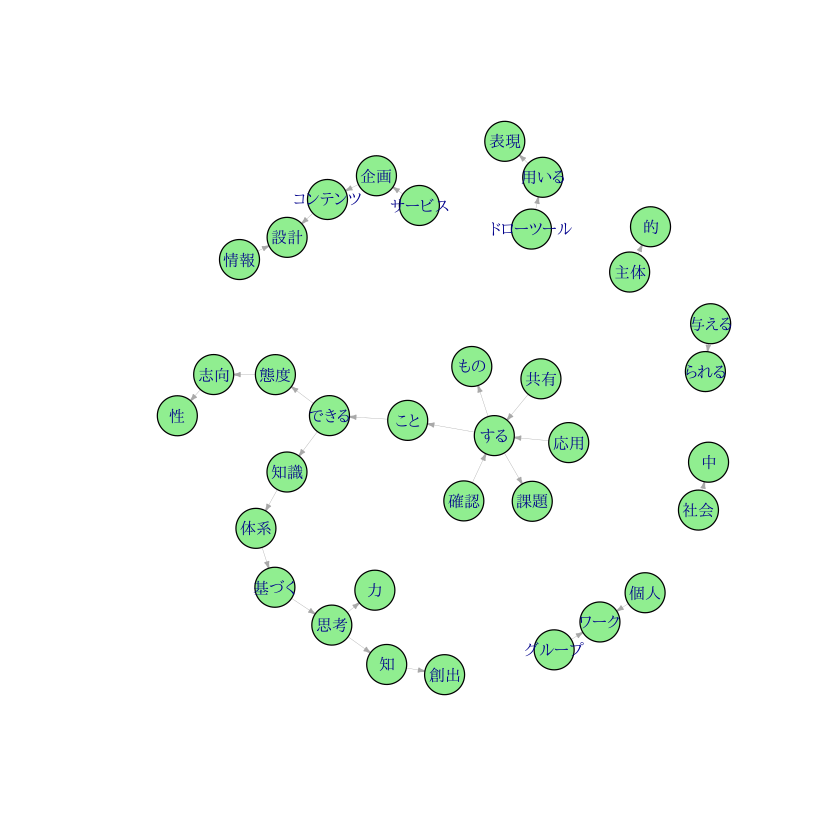

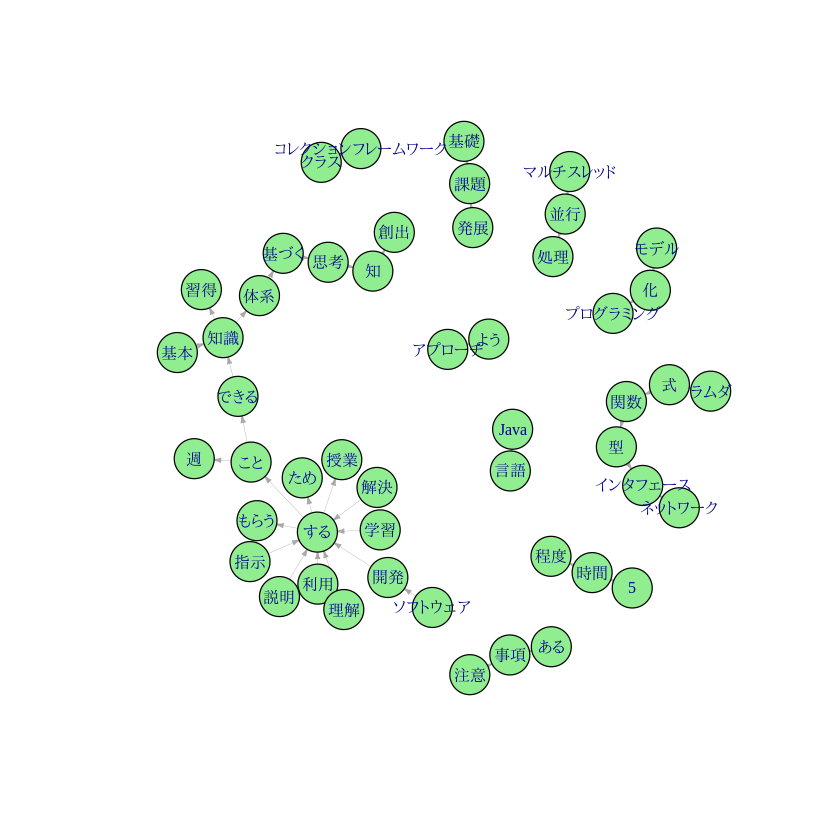

In [8]:
pos <- c("名詞","形容詞","動詞")
fns <- c("32140","32556","32244")    # 3基礎演習の科目番号（整数）ベクトル　※<1>を補完すること
fns <- paste0("NE2022/", fns, ".txt")
for(fn in fns) cnet(fn, pos)

###<気付き>
Ex.2-5に含まれていた言葉はEx2-6でも確認できた。矢印の方向に着目するとそれぞれの科目に沿った中心語が存在した。
NE2022/32140.txt 情報を取り扱うためにどのように収集し、どのように扱う（分析）するのかを実習を通して学ぶ科目だと推測できる。
NE2022/32556.txt はグループワークと個人ワークを取り入れ、情報を設計、企画、コンテンツ化などして社会でどのように扱われているのか創出することができる科目だと推測できる。
NE2022/32244.txt はさまざまなプログラミングに関するワードが上がっているため、プログラミングを通して開発、アプローチを行なっていくかもくだと推測できる。


